In [25]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [26]:
data = pd.read_csv("data/target.csv")

In [27]:
data=data.drop(['Unnamed: 7'], axis=1)
data=data.drop(['customer_id'], axis=1)

In [28]:
data = data.dropna(how='any')

In [29]:
data['res_type']= data['res_type'].map({'CN':0, 'CO': 1, 'RE': 2, 'TO': 3,'SI': 4}).astype(int)

In [30]:
data=pd.get_dummies(data=data,columns=['geo_group'])

In [31]:
X = data.drop(['res_type'], axis=1).values.astype('float64')

In [32]:
Y = data['res_type'].values.astype('int64')

In [33]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78804

In [34]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [35]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [36]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [37]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [38]:
model = Sequential()

In [39]:
model.add(SimpleRNN(units=8, input_shape=(8,1)))

In [40]:
model.add(Dense(5, activation = "softmax"))

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 8)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [43]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 70923 samples, validate on 7881 samples
Epoch 1/30
70923/70923 [==============================] - 4s 62us/step - loss: 1.7975 - acc: 0.2025 - val_loss: 1.6427 - val_acc: 0.2449
Epoch 2/30
70923/70923 [==============================] - 2s 23us/step - loss: 1.5132 - acc: 0.3238 - val_loss: 1.3907 - val_acc: 0.3894
Epoch 3/30
70923/70923 [==============================] - 2s 31us/step - loss: 1.2996 - acc: 0.4009 - val_loss: 1.2417 - val_acc: 0.4236
Epoch 4/30
70923/70923 [==============================] - 2s 24us/step - loss: 1.1974 - acc: 0.4913 - val_loss: 1.1592 - val_acc: 0.5298
Epoch 5/30
70923/70923 [==============================] - 1s 21us/step - loss: 1.1179 - acc: 0.5550 - val_loss: 1.0751 - val_acc: 0.5695
Epoch 6/30
70923/70923 [==============================] - 2s 30us/step - loss: 1.0280 - acc: 0.5967 - val_loss: 0.9767 - val_acc: 0.6093
Epoch 7/30
70923/70923 [==============================] - 2s 32us/step - loss: 0.9387 - acc: 0.6552 - val_loss: 0.8981 - val_acc:

In [44]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

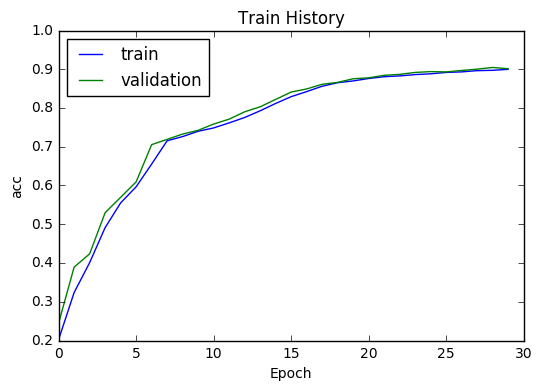

In [45]:
show_train_history(train_history,'acc','val_acc')

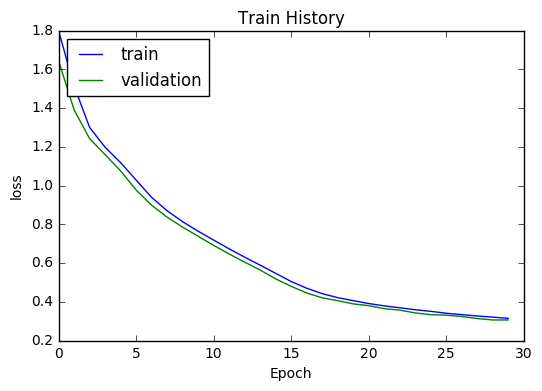

In [46]:
show_train_history(train_history,'loss','val_loss')

In [47]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19702/19702 [==============================] - 6s 310us/step


In [48]:
scores[1]

0.900365445162727